In [2]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

ket1 = basis(2,0) # Basis state 1
ket2 = basis(2,1) # Basis state 2

## Open system
The total Hamiltonian of a quantum system is given by

$$
\hat{H}_{\text {Total}}= \hat{H}_{\text {SoI}}+\hat{V}_{\text {IoI}}+\hat{V}_{\text {SoI}}+\hat{H}_{\text {world}}+\hat{V}_{\text {world}}
$$

$\hat{H}_{\text{SoI}}$ - the Hamiltonian of the system of interest, e.g., the radical pair.

$\hat{V}_{\text{IoI}}$ - interactions of interest, e.g., singlet-triplet interconversion.

$\hat{V}_{\text {SoI}}$ - interactions within the system of interest that we do not want to describe explicitly, e.g., the radical pair recombination.

$\hat{V}_{\text {world}}$ - interactions with the rest of the world, e.g., fluorescence.

In the open system approach, we only keep $\hat{H}_{\text {SoI}}+\hat{V}_{\text {IoI}}$ in the Hamiltonian and treat the rest as relaxation.

## Lindblad equation

The evolution of an open quantum system with relaxation is described by the Lindblad master equation

$$
    \dfrac{d}{dt}\hat{\rho}=-\dfrac{i}{\hbar}\left[\hat{H},\hat{\rho}\right]+\dfrac{1}{2}\sum_{n} \left(2\hat{L}_n\hat{\rho} \hat{L}_n^{\dagger}-\hat{\rho}\hat{L}_n^{\dagger}\hat{L}_n-\hat{L}_n^{\dagger}\hat{L}_n\hat{\rho}\right),
$$

where $\hat{L}_n$ is a collapse operator corresponding to the relaxation process $n$. The form of $\hat{L}_n$ depends on the nature of the relaxation process.

### Common collapse operators:

$\hat{L}=\sqrt{\Gamma}|2\rangle\langle1|$ - irreversible transitions from $|1\rangle$ to $|2\rangle$ at a rate $\Gamma$ (e.g., due to spontaneous emission). Corresponds to longitudinal relaxation at a rate $\Gamma$:

    $$
    \dot{\rho}_{22}=\Gamma\rho_{11},\ \dot{\rho}_{11}=-\Gamma\rho_{11},
    $$

and transverse relaxation at a rate $\Gamma/2$:

    $$
     \dot{\rho}_{12}=-\dfrac{\Gamma}{2} \rho_{12},\ \dot{\rho}_{21}=-\dfrac{\Gamma}{2} \rho_{21}\\
    $$

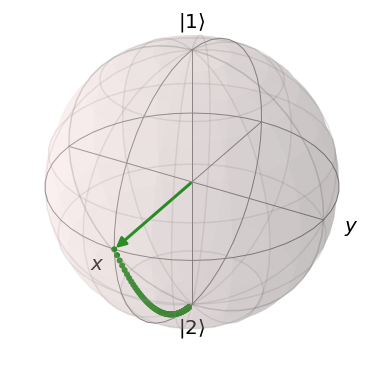

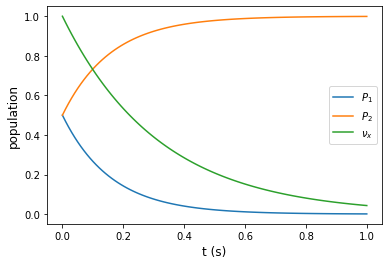

In [5]:
# Hamiltonian
H = qeye(2)

# Time grid
T = 1 # duration
N = 100 # number of points
t = np.linspace(0,T,N) # time grid

# Projection operators to find the population in the basis states
P1 = ket1.proj()
P2 = ket2.proj()

# Collpase operators
Gamma1 = 2*np.pi # Relaxation rate
L1 = np.sqrt(Gamma1)*ket2*ket1.dag() # Relaxation from ket1 to ket2
c_ops = [L1]

# Initial state
psi0 = (ket1+ket2).unit()

# Solve the master equation starting in ket1
result = mesolve(H, psi0, t, c_ops, [P1, P2, sigmax(), sigmay(), sigmaz()])

# Evolution on the Bloch sphere
b = Bloch()
b.zlabel = ['$\\left|1\\right>$', '$\\left|2\\right>$']
b.make_sphere()
b.add_points([result.expect[2],result.expect[3],result.expect[4]])
b.add_states([psi0, 0.8*H.unit()])
b.point_color=['green']
b.show()

# Plot the populations
fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0],label=r'$P_{1}$')
ax.plot(result.times, result.expect[1],label=r'$P_{2}$')
ax.plot(result.times, result.expect[2],label=r'$\nu_x$')
ax.set_xlabel('t (s)',fontsize=12)
ax.set_ylabel('population',fontsize=12)
ax.legend(loc=0)

$\hat{L}=\sqrt{\Gamma}\hat{\sigma}_z=\sqrt{\Gamma}\left(|1\rangle\langle1|-|2\rangle\langle2|\right)$ - dephasing between $|1\rangle$ and $|2\rangle$ at a rate $\Gamma$. Corresponds to transverse relaxation at a rate $\Gamma$.

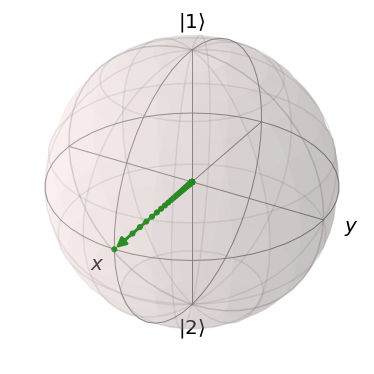

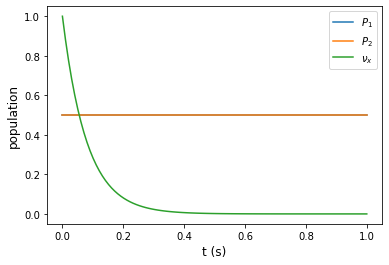

In [6]:
# Hamiltonian
H = qeye(2)

# Time grid
T = 1 # duration
N = 100 # number of points
t = np.linspace(0,T,N) # time grid

# Projection operators to find the population in the basis states
P1 = ket1.proj()
P2 = ket2.proj()

# Collpase operators
Gamma2 = 2*np.pi # Relaxation rate
L2 = np.sqrt(Gamma2)*sigmaz() # Dephasing
c_ops = [L2]

# Initial state
psi0 = (ket1+ket2).unit()

# Solve the master equation starting in ket1
result = mesolve(H, psi0, t, c_ops, [P1, P2, sigmax(), sigmay(), sigmaz()])

# Evolution on the Bloch sphere
b = Bloch()
b.zlabel = ['$\\left|1\\right>$', '$\\left|2\\right>$']
b.make_sphere()
b.add_points([result.expect[2],result.expect[3],result.expect[4]])
b.add_states([psi0, 0.8*H.unit()])
b.point_color=['green']
b.show()

# Plot the populations
fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0],label=r'$P_{1}$')
ax.plot(result.times, result.expect[1],label=r'$P_{2}$')
ax.plot(result.times, result.expect[2],label=r'$\nu_x$')
ax.set_xlabel('t (s)',fontsize=12)
ax.set_ylabel('population',fontsize=12)
ax.legend(loc=0)


## Transverse relaxation

- Relaxation of $\nu_x$ and $\nu_y$.
- Can occur without longitudinal relaxation (e.g., dephasing).
- Leads to ensemble depolarization.
- Typically characterized in terms of the relaxation rate $\Gamma_2$ and the relaxation time $T_2$.
- $\Gamma_2\ge\dfrac{\Gamma_1}{2},\ T_2 \le2T_1$.